<a href="https://colab.research.google.com/github/gabrielfernandezf/py/blob/master/Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/My Drive/Signals_Merval/raw_data/merval_clean_1.0.xlsx' 
f = open(filename, "r")
df = pd.read_excel(filename)

In [4]:
df = df.set_index('Date')
df = df.drop('Unnamed: 0', 1)

In [5]:
cols = df.columns.to_list()
df2 = df.loc[:, cols].div(df['FX'], axis=0)

In [6]:
df2 = df2.drop('FX', 1)

In [7]:
# Log(returns)
returns = df2['MERVAL'].apply(np.log).diff(1)

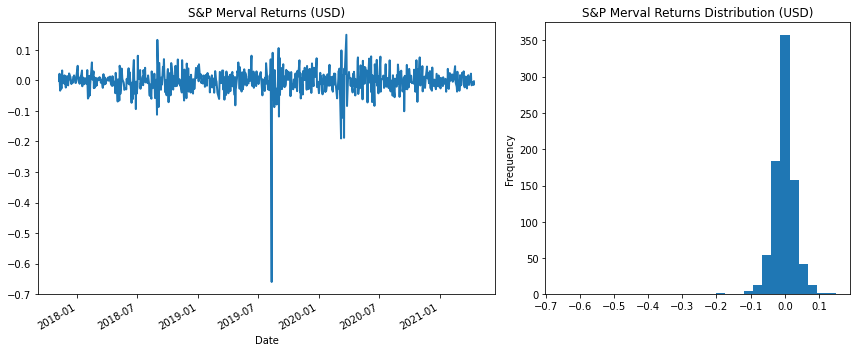

In [15]:
subplots_ratio = dict(width_ratios=[3,2], height_ratios=[1])
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(12,5))
returns.plot(title='S&P Merval Returns (USD)', ax=ax[0], grid=False, linewidth=2)
returns.plot.hist(title='S&P Merval Returns Distribution (USD)', ax=ax[1], grid=False, bins=30)
plt.tight_layout()
fig_path_log = '/content/drive/My Drive/Signals_Merval/viz/stacionarity-log-returns.png' 
plt.savefig(fig_path_log)

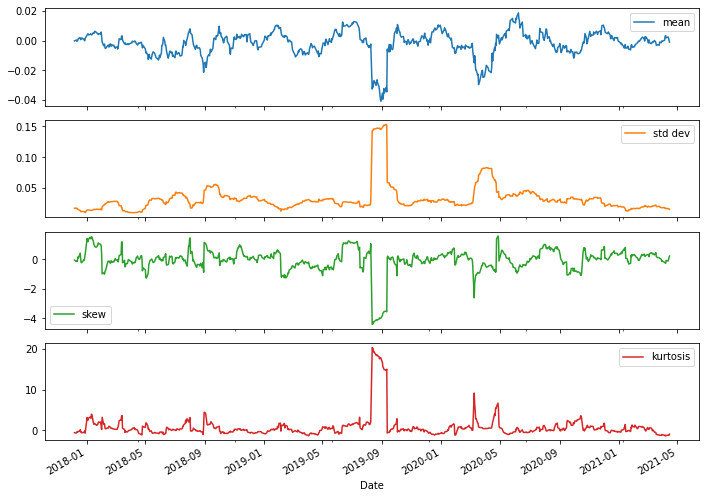

In [16]:
w = 22
s1 = returns.rolling(w).mean()
s2 = returns.rolling(w).std()
s3 = returns.rolling(w).skew()
s4 = returns.rolling(w).kurt()

signals = pd.concat([s1, s2, s3, s4], axis=1)
signals.columns = ['mean', 'std dev', 'skew', 'kurtosis']
signals.plot(subplots=True, figsize=(10,7));
plt.tight_layout()
fig_path_roll = '/content/drive/My Drive/Signals_Merval/viz/roll_stats.png' 
plt.savefig(fig_path_roll)

In [17]:
filename = '/content/drive/My Drive/Signals_Merval/raw_data/merval.xlsx' 
f = open(filename, "r")
df_merv = pd.read_excel(filename)

In [18]:
#Setting Date column as index
df_merv = df_merv.set_index('Date')

In [19]:
#Filling missing data
df_merv = df_merv.fillna(df_merv.rolling(3, min_periods=1).mean().shift())

In [20]:
#Getting Merval, and Stocks values in USD 
cols = df_merv.columns.to_list()
df_merv = df_merv.loc[:, cols].div(df_merv['FX'], axis=0)
df_merv = df_merv.loc[:, 'MERVAL':'MERVAL']

In [21]:
#log(returns)
returns = df_merv.apply(np.log).diff(1)

In [22]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')

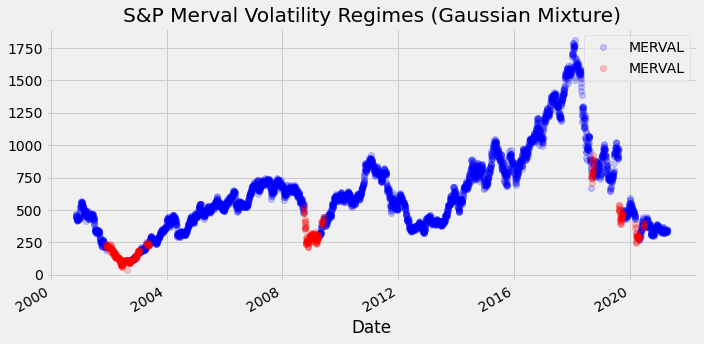

In [23]:
from sklearn.mixture import GaussianMixture

w = 22
vol = returns.rolling(w).std()
vol = vol.dropna()

labels = GaussianMixture(2).fit_predict(vol.values.reshape(-1,1))

df_merv = df_merv.reindex(vol.index)
ax = df_merv[labels==0].plot(style='bo', alpha=0.2)
df_merv[labels==1].plot(style='ro', alpha=0.2, ax = ax)
plt.title('S&P Merval Volatility Regimes (Gaussian Mixture)')
plt.tight_layout()
fig_path_gauss = '/content/drive/My Drive/Signals_Merval/viz/gauss_mix.png' 
plt.savefig(fig_path_gauss)